In [12]:
from matplotlib import pyplot as plt
import numpy as np
import pandas as pd

from copy import copy as copy

import os
import sys

import pprint

from keras.datasets import mnist

In [13]:
PLOT = True
NUM_OF_CLASS = 10
VERBOSE = True

In [14]:
from keras.models import Sequential
from keras.layers import Dense, Conv2D, MaxPooling2D, Dropout, Flatten

import keras.utils

In [15]:
# The data, split between train and test sets:
(Input_train, Objetive_train), (Input_test, Objetive_test) = mnist.load_data()

Input_train = Input_train.reshape(tuple(list(Input_train.shape) + [1]))
Input_test = Input_test.reshape(tuple(list(Input_test.shape) + [1]))

print('Input_train shape:', Input_train.shape)
print(Input_train.shape[0], 'train samples')
print(Input_test.shape[0], 'test samples')

Input_train shape: (60000, 28, 28, 1)
60000 train samples
10000 test samples


In [16]:
# Convert class vectors to binary class matrices.
Objetive_train = keras.utils.to_categorical(Objetive_train, NUM_OF_CLASS)
Objetive_test = keras.utils.to_categorical(Objetive_test, NUM_OF_CLASS)

In [17]:
#Architecture
def createModel(input_shape, nClasses):
    model = Sequential()
    
    model.add(Conv2D(32, (2, 2), padding='same', activation='relu', input_shape=input_shape))
    model.add(Conv2D(28, (3, 3), activation='selu'))
    model.add(MaxPooling2D(pool_size=(2, 2)))
    model.add(Dropout(0.3))
 
#     model.add(Conv2D(48, (2, 2), padding='same', activation='selu'))
#     model.add(Conv2D(48, (4, 4), activation='relu'))
#     model.add(MaxPooling2D(pool_size=(2, 2)))
#     model.add(Dropout(0.3))
    
#     model.add(Conv2D(64, (3, 3), padding='same', activation='relu'))
#     model.add(Conv2D(64, (3, 3), activation='selu'))
#     model.add(MaxPooling2D(pool_size=(2, 2)))
#     model.add(Dropout(0.3))
 
    model.add(Flatten())
#     model.add(Dense(500, activation='selu'))
#     model.add(Dropout(0.8))
#     model.add(Dense(300, activation='relu'))
#     model.add(Dropout(0.4))
    model.add(Dense(nClasses, activation='softmax'))
     
    return model

In [18]:
## Train Parameters

epochs = 50
batch_size = 500

###

output_model = createModel(Input_train.shape[1:], NUM_OF_CLASS)
output_model.compile(optimizer='adadelta', loss='categorical_crossentropy', metrics=['accuracy'])

In [19]:
output_model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_3 (Conv2D)            (None, 28, 28, 28)        280       
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 27, 27, 14)        1582      
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 13, 13, 14)        0         
_________________________________________________________________
dropout_2 (Dropout)          (None, 13, 13, 14)        0         
_________________________________________________________________
flatten_2 (Flatten)          (None, 2366)              0         
_________________________________________________________________
dense_2 (Dense)              (None, 10)                23670     
Total params: 25,532
Trainable params: 25,532
Non-trainable params: 0
_________________________________________________________________


In [20]:
history = output_model.fit(Input_train, Objetive_train, batch_size=batch_size, epochs=epochs, verbose=VERBOSE, 
                       validation_data=(Input_test, Objetive_test))

Train on 60000 samples, validate on 10000 samples
Epoch 1/50
60000/60000 [==============================] - 38s 641us/step - loss: 1.2502 - acc: 0.8328 - val_loss: 0.1336 - val_acc: 0.9608
Epoch 2/50
60000/60000 [==============================] - 38s 632us/step - loss: 0.1773 - acc: 0.9484 - val_loss: 0.0784 - val_acc: 0.9776
Epoch 3/50
60000/60000 [==============================] - 39s 646us/step - loss: 0.1219 - acc: 0.9637 - val_loss: 0.0680 - val_acc: 0.9808
Epoch 4/50
60000/60000 [==============================] - 38s 629us/step - loss: 0.0939 - acc: 0.9726 - val_loss: 0.0578 - val_acc: 0.9830
Epoch 5/50
60000/60000 [==============================] - 38s 627us/step - loss: 0.0787 - acc: 0.9768 - val_loss: 0.0615 - val_acc: 0.9812
Epoch 6/50
60000/60000 [==============================] - 38s 627us/step - loss: 0.0680 - acc: 0.9791 - val_loss: 0.0551 - val_acc: 0.9844
Epoch 7/50
60000/60000 [==============================] - 39s 651us/step - loss: 0.0615 - acc: 0.9808 - val_loss: 0.

In [21]:
output_model.evaluate(Input_test, Objetive_test)

10000/10000 [==============================] - 3s 299us/step


[0.057943143819275886, 0.988]

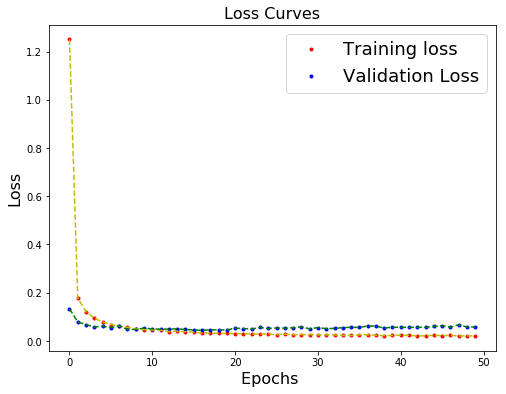

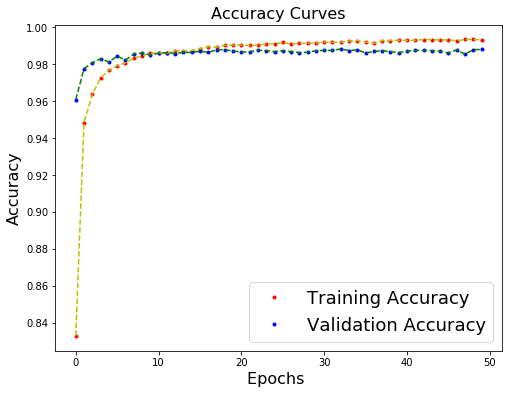

In [22]:
if PLOT:
    ## Plots
    # Loss Curves
    plt.figure(figsize=[8,6])
    plt.plot(history.history['loss'],'.r')
    plt.plot(history.history['val_loss'],'.b')
    plt.plot(history.history['loss'],'--y')
    plt.plot(history.history['val_loss'],'--g')
    plt.legend(['Training loss', 'Validation Loss'],fontsize=18)
    plt.xlabel('Epochs ',fontsize=16)
    plt.ylabel('Loss',fontsize=16)
    plt.title('Loss Curves',fontsize=16)
    plt.show()

    # Accuracy Curves
    plt.figure(figsize=[8,6])
    plt.plot(history.history['acc'],'.r')
    plt.plot(history.history['val_acc'],'.b')
    plt.plot(history.history['acc'],'--y')
    plt.plot(history.history['val_acc'],'--g')
    plt.legend(['Training Accuracy', 'Validation Accuracy'],fontsize=18)
    plt.xlabel('Epochs ',fontsize=16)
    plt.ylabel('Accuracy',fontsize=16)
    plt.title('Accuracy Curves',fontsize=16)
    plt.show()

In [23]:
output_model.save(filepath="./mnist_model_v1", include_optimizer=1)